In [26]:
import config
import csv
from mysql.connector import errorcode
import pandas as pd
import mysql.connector as mysql
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


In [2]:
DB_NAME = 'Moovies'

In [3]:
cnx = mysql.connect(
    host = config.host,
    user = config.user,
    passwd = config.password,
#     database = DB_NAME
)
c = cnx.cursor()
c

In [5]:
# c.execute("""SELECT e.actor, genreId, 
#             gid.genreName, mj.movieTitle,
#             (mm.GrossDomestic - mm.Budget) as profit
#             FROM Moovies.actors e
#             JOIN Moovies.movie_genres g using(imdbid)
#             JOIN Moovies.genreid gid using(genreid)
#             JOIN Moovies.movie_genres o using(genreid)
#             JOIN Moovies.john mj ON mj.imdbid = o.imdbid
#             JOIN Moovies.money mm ON mj.movieTitle = mm.Title
#             WHERE gid.genreName IN ('Comedy', 'Action', 'Drama', 'Adventure', 'Thriller')
#             ORDER BY e.actor
#                                 """)

In [ ]:
# df = pd.DataFrame(c.fetchall())
# df.columns = [x[0] for x in c.description]

In [52]:
df = pd.read_csv("ActorsAVGprofitGen.csv")
df.head()

,actor,nummovies,Wavgrating,GenreName
0,Giancarlo Esposito,8,0.451557,Comedy
1,Adam Sandler,8,0.394464,Comedy
2,Tim Robbins,6,0.346021,Comedy
3,Regina Hall,6,0.333910,Comedy
4,Diane Keaton,6,0.332180,Comedy


In [53]:
toptencomdir_rating = df[0:15]
sum(df['nummovies'])

1160

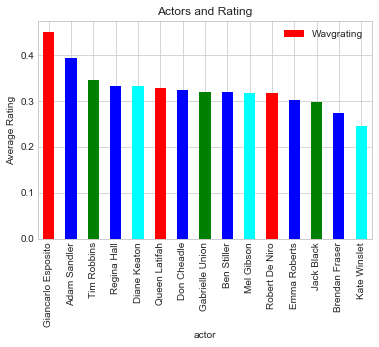

In [62]:
ax = toptencomdir_rating.plot.bar(x = 'actor', y= 'Wavgrating', color=['r', 'b', 'green', 'blue', 'cyan'])
ax.set_ylabel('Average Rating')

ax.set_title('Actors and Rating')

plt.show()

In [ ]:
figs, ax = plt.subplot(figsize = (15,7))
ax.toptencomdir_profit.bar(df['actor'], df['avgrating'], )
ax.set_xlabel('Actor')
ax.set_ylabel('Average Rating')
ax.set_title('Actors and Profit')
plt.show()

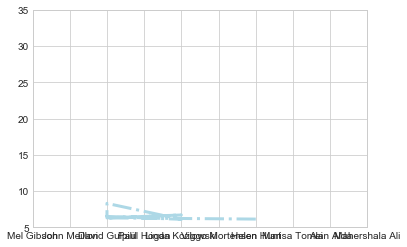

In [29]:
# Define a new figure with matplotlib's .plot() function. 
new_figure = plt.figure()

# Add a subplot to the figure - a new axes
ax = new_figure.add_subplot(111)

# Generate a line plot 
ax.plot(toptencomdir_profit['nummovies'],toptencomdir_profit['avgrating'], color='lightblue', linewidth=3, linestyle = '-.')

# Draw a scatter plot on same axes
ax.scatter(toptencomdir_profit['actor'], toptencomdir_profit['profit'], color='red', marker='o')

# Set the limits of x and y for axes
ax.set_xlim(0, 9), ax.set_ylim(5,35)

# Show the plot
plt.show()

In [49]:
df2 = pd.read_csv("ActorsAVGWavgprofit.csv")
df2.head()

,actor,nummovies,Wavgprofit,GenreName
0,Mel Gibson,6,5.059762e+06,Comedy
1,Queen Latifah,6,2.656453e+06,Comedy
2,Adam Sandler,8,2.355825e+06,Comedy
3,Viggo Mortensen,4,2.195224e+06,Comedy
4,Jack Black,6,1.923105e+06,Comedy


In [45]:
toptencomdir_profits = df2[0:15]

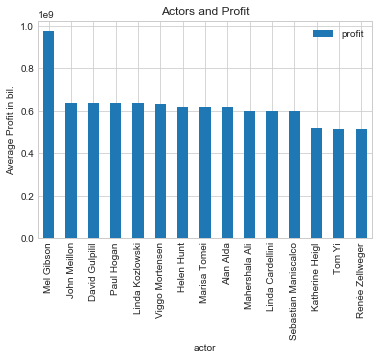

In [51]:
ax = toptencomdir_rating.plot.bar(x = 'actor', y= 'profit')
ax.set_ylabel('Average Profit in bil.')

ax.set_title('Actors and Profit')

plt.show()

In [5]:
df3 = pd.read_csv("ScattorPlotAPG.csv")
df3.head()

,actor,nummovies,Wavgprofit,Wavgrating,GenreName
0,Giancarlo Esposito,8,-45675.008896,0.451557,Comedy
1,Adam Sandler,8,-142871.656256,0.394464,Comedy
2,Tim Robbins,6,-192993.835643,0.346021,Comedy
3,Regina Hall,6,-45370.096686,0.333910,Comedy
4,Diane Keaton,6,303977.290358,0.332180,Comedy


In [22]:
actor = df3.actor

In [23]:
weight_rating = df3.Wavgrating

In [29]:
weight_profit = df3.Wavgprofit

In [30]:
colors = 'black'

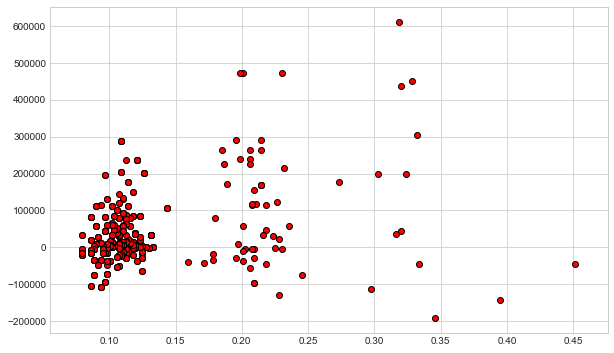

[[1.         0.29785751]
 [0.29785751 1.        ]]


In [36]:
plt.figure(figsize = (10,6))
plt.scatter(weight_rating, weight_profit, label = 'Comedy Actors', edgecolor = "black", color = "red")
plt.line()
plt.show()
print(np.corrcoef(weight_rating,weight_profit))